In [101]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
from DataSet import *

import sys
sys.path.append("..")
import TargetApplicationScope

%matplotlib notebook

# Compiling/Sampling of Data 

### Random Generation
Coordinates: are randomly generated 
Datetime: points are randomly generated between a range in the past 
Speed: 

### Multivariate 
Elevation 
Temperature 
RainSensor 

### GTSBD:
SignType: labelled from the dataset


In [119]:
data_set = generate_dataset("data/base_test_data.csv")

GENERATING COORDINATES DATA
GENERATING ELEVATION/ALTITUDE DATA
ELEVATION DATA FINISHED
DATETIME DATA


In [103]:
t = TargetApplicationScope.TargetApplicationScope()
lookup_table = t.__dict__
appropriate_test_cases = 5

In [130]:
selected_sample = 2000
chosen_idx = np.random.choice(selected_sample, replace=False, size=selected_sample)
df_trimmed = data_set.iloc[chosen_idx]
print(df_trimmed.describe())


            Width       Height       Roi.X1       Roi.Y1       Roi.X2  \
count  2000.00000  2000.000000  2000.000000  2000.000000  2000.000000   
mean     47.22250    47.860000     5.815500     5.839000    41.774000   
std      20.09308    20.268147     1.139346     1.160928    19.215164   
min      25.00000    26.000000     5.000000     5.000000    20.000000   
25%      34.00000    34.000000     5.000000     5.000000    29.000000   
50%      41.50000    42.000000     6.000000     6.000000    36.000000   
75%      53.00000    54.000000     6.000000     6.000000    48.000000   
max     182.00000   180.000000    16.000000    16.000000   167.000000   

           Roi.Y2      ClassId     Latitude    Longitude  Altitude  \
count  2000.00000  2000.000000  2000.000000  2000.000000       0.0   
mean     42.39100     1.825000    50.405911    10.045654       NaN   
std      19.37738     0.845418     2.576407     2.380987       NaN   
min      20.00000     0.000000    46.004419     6.004616      

# Coverage/Sufficiency aspects

### Range-based Parameters
Verifies parameters fit between the TAS application_scope {min/max_values}



In [131]:
## Range related parameters: just checking min & max
def return_min_max(column):
    """ returns the max & min on column [min, max]"""
    return [min(column), max(column)]


def check_range(tas_parms, column, sufficency = 0 ):
    min_max = return_min_max(column)
    for key in tas_parms:
        if "min" in key:
            if tas_parms[key] <= min_max[0]:
                sufficency = sufficency + 0.5
        if "max" in key:
            if tas_parms[key] >= min_max[1]:
                sufficency = sufficency + 0.5
    return sufficency

In [132]:
def validate_range_based_params(data, test_cases):
    """
     Range-based:
    + temperatureRange(temperature, min_temp, max_temp):
    + velocityRange(min_velocity, max_velocity)
    + rainSensorRange(min_rain, max_rain): TODO:
    + elevationSensorRange(min_elevation, max_elevation)
    + yearRange(year, timestamp)
    """
    #  + velocityRange(min_velocity, max_velocity)
    validation = check_range(lookup_table['temperature'], data['Temperature']) + \
                 check_range(lookup_table['velocity'], data['Speed'] ) +\
                 check_range(lookup_table['elevation'], data['Elevation']) 
            
    return validation/test_cases

validate_range_based_params(df_trimmed, 3)

0.8333333333333334

## Density-Based Parameters 

### Coordinates
-- plots Density Based Coordinates

### Datetime


In [120]:
#arealarger than 4km^2, each hour of a day … with at least x cases


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


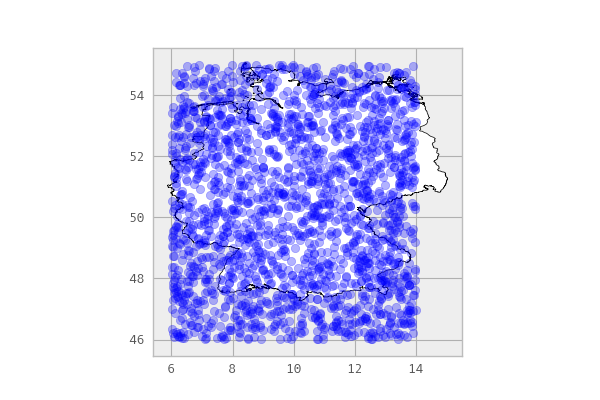

683.5880077832587


In [166]:
import geopandas as gpd
import shapely
import pandas as pd
import geopandas
from shapely.geometry import Point
from geopy import distance


def plot_coordinates():
    df_trimmed['Coordinates_Joined'] = list(zip(df_trimmed.Longitude, df_trimmed.Latitude))

    df_trimmed['Coordinates_Points'] = df_trimmed['Coordinates_Joined'].apply(Point)

    gdf = geopandas.GeoDataFrame(df_trimmed, geometry='Coordinates_Points')

    germany_plot = gpd.read_file("shp/Germanyboundary87.shp")

    ax = germany_plot.plot(
        color='white', edgecolor='black')

    gdf.plot(ax=ax, color='blue',alpha=0.3)



    
plot_coordinates()

## could use this to detect distance between points
newport_ri = df_trimmed.Coordinates_Joined[3]
cleveland_oh = df_trimmed.Coordinates_Joined[10]
print(distance.distance(newport_ri, cleveland_oh).km)   



In [147]:
## HAVERSINE & KD TREE

import numpy as np
from sklearn.neighbors import KDTree
np.random.seed(0)
X = np.random.random((5, 2))  # 5 points in 2 dimensions
tree = KDTree(X)
print(tree)
nearest_dist, nearest_ind = tree.query(X, k=2)  # k=2 nearest neighbors where k1 = identity
print(X)
print(nearest_dist[:, 1])    # drop id; assumes sorted -> see args!
print(nearest_ind[:, 1])  

[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]]
[0.14306129 0.1786471  0.14306129 0.20869372 0.39536284]
[2 0 0 0 1]


<IPython.core.display.Javascript object>


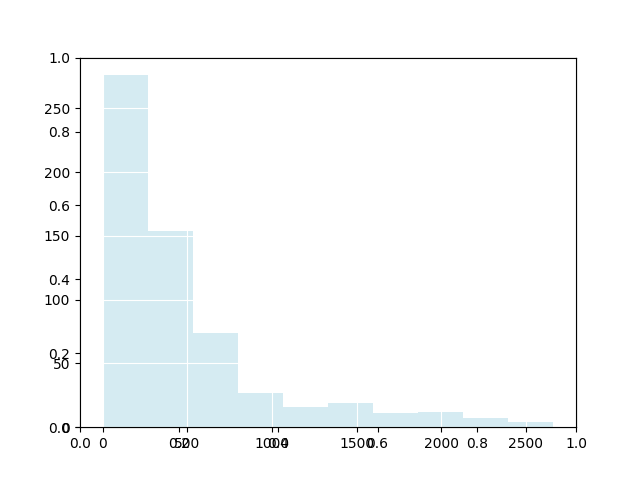

In [118]:
## Distribution -> https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0
## Elevation of Germany 

fig, ax = plt.subplots()

ax = fig.add_subplot(111)
ax.grid(color='white', linestyle='solid')

x = np.random.normal(size=1000)
ax.hist(df_trimmed['Elevation'], histtype='stepfilled', fc='lightblue', alpha=0.5);


In [135]:
from datetime import datetime

df_trimmed['Timestamp'] = pd.to_datetime(df_trimmed['Datetime'], unit='s')
df_trimmed.index = df_trimmed['Timestamp']
df_trimmed.resample('W').count()


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Filename,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Latitude,Longitude,Altitude,Datetime,Speed,Coordinates,Elevation,Temperature,Coordinates_Joined,Coordinates_Points,Timestamp
Timestamp,,,,,,,,,,,,,,,,,,,
2016-04-03,9,9,9,9,9,9,9,9,9,9,0,9,9,9,9,9,9,9,9
2016-04-10,11,11,11,11,11,11,11,11,11,11,0,11,11,11,11,11,11,11,11
2016-04-17,5,5,5,5,5,5,5,5,5,5,0,5,5,5,5,5,5,5,5
2016-04-24,16,16,16,16,16,16,16,16,16,16,0,16,16,16,16,16,16,16,16
2016-05-01,15,15,15,15,15,15,15,15,15,15,0,15,15,15,15,15,15,15,15
2016-05-08,13,13,13,13,13,13,13,13,13,13,0,13,13,13,13,13,13,13,13
2016-05-15,6,6,6,6,6,6,6,6,6,6,0,6,6,6,6,6,6,6,6
2016-05-22,16,16,16,16,16,16,16,16,16,16,0,16,16,16,16,16,16,16,16
2016-05-29,12,12,12,12,12,12,12,12,12,12,0,12,12,12,12,12,12,12,12


# Representativeness aspects

<IPython.core.display.Javascript object>


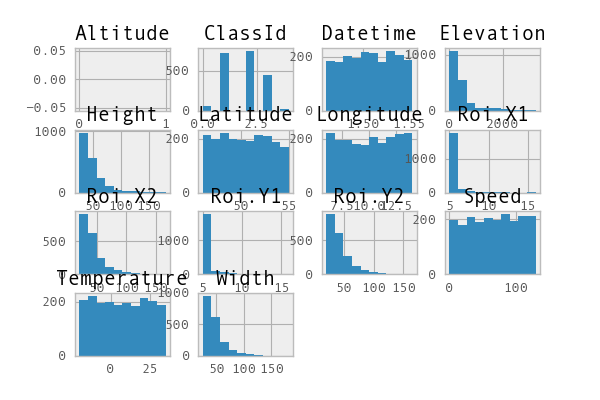

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1364685c0>,
      dtype=object)

In [161]:
## can use some of the Weather sampling code
df_trimmed.hist()

